# Number of Anchor Box deciding for the object.

In [1]:
import pandas as pd
import json
import numpy as np
from PIL import Image
from pandas.io.json import json_normalize

In [2]:
# reading the annonate files of images
annonate_files=pd.read_json("Annonate.json",orient='columns', ).T

In [3]:
Annonate = annonate_files[['filename','regions','size']].reset_index(drop=True)

In [4]:
# Image Size
filepath='C:/Users/infy_/Documents/TSAI/My_Code/Dog_Images/'
Annonate['Image_Width'], Annonate['Image_Height']=Annonate.apply(lambda row:(Image.open(filepath+row['filename'])).size, axis=1).str

In [5]:
Annonate_Region = (pd.concat({i: json_normalize(x) for i, x in Annonate.pop('regions').items()})
         .reset_index(level=1, drop=True)
         .join(Annonate)
         .reset_index(drop=True))

In [6]:
Annonate_Region.rename(columns={'region_attributes.class':'Class', 
                                'shape_attributes.height':'Height',
                                 'shape_attributes.width':'Width',
                                 'shape_attributes.x':'X',
                                 'shape_attributes.y':'Y',
                               'shape_attributes.name':'Shape'}, inplace=True)

In [7]:
Annonate_Region.dropna(axis=1,inplace=True)

In [8]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [9]:
X=Annonate_Region[['Height','Width']]

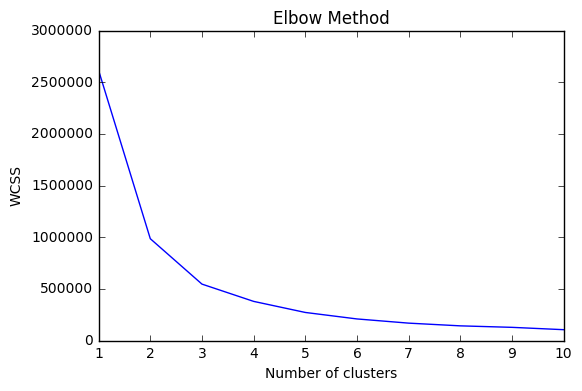

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

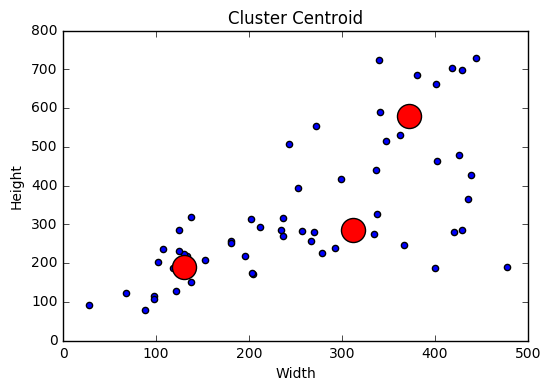

In [12]:
plt.scatter(X['Width'], X['Height'])
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red')
plt.title('Cluster Centroid')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [13]:
Annonate_Region['Template'] = kmeans.labels_

In [14]:
kmeans.cluster_centers_

array([[ 285.09090909,  311.68181818],
       [ 580.26666667,  372.06666667],
       [ 189.69565217,  130.17391304]])

In [15]:
Annonate_Region['Centroid'] = list(map(lambda x:kmeans.cluster_centers_[x], kmeans.labels_))

In [16]:
Annonate_Region['Centroid_Height'],Annonate_Region['Centroid_Width']=Annonate_Region['Centroid'].str

In [17]:
Annonate_Region['Intersection'] = np.minimum(Annonate_Region['Height'],Annonate_Region['Centroid_Height'])*np.minimum(Annonate_Region['Width'],Annonate_Region['Centroid_Width'])

In [18]:
Annonate_Region['Union']=(Annonate_Region['Height']*Annonate_Region['Width'])+(Annonate_Region['Centroid_Height']*Annonate_Region['Centroid_Width'])-(Annonate_Region['Intersection'])

In [19]:
Annonate_Region['IOU'] = Annonate_Region['Intersection']/Annonate_Region['Union']

In [20]:
Annonate_Region

,Class,Height,Shape,Width,X,Y,filename,size,Image_Width,Image_Height,Template,Centroid,Centroid_Height,Centroid_Width,Intersection,Union,IOU
0,Dog,171,rect,204,242,5,chihuahua-dog-puppy-cute-39317.jpeg,24793,500,333,2,"[189.695652174, 130.173913043]",189.695652,130.173913,22259.739130,37317.686200,0.596493
1,Dog,209,rect,153,154,86,dog-young-dog-small-dog-maltese.jpg,31012,500,332,2,"[189.695652174, 130.173913043]",189.695652,130.173913,24693.425331,31977.000000,0.772225
2,Dog,327,rect,338,146,3,french-bulldog-summer-smile-joy-160846.jpeg,21058,500,345,0,"[285.090909091, 311.681818182]",285.090909,311.681818,88857.652893,110526.000000,0.803952
3,Dog,128,rect,121,148,130,pexels-photo (1).jpg,24260,500,333,2,"[189.695652174, 130.173913043]",189.695652,130.173913,15488.000000,24693.425331,0.627211
4,Human,114,rect,98,156,98,pexels-photo (1).jpg,24260,500,333,2,"[189.695652174, 130.173913043]",189.695652,130.173913,11172.000000,24693.425331,0.452428
5,Dog,217,rect,133,124,79,pexels-photo-1108099.jpeg,21675,500,375,2,"[189.695652174, 130.173913043]",189.695652,130.173913,24693.425331,28861.000000,0.855598
6,Dog,224,rect,130,258,77,pexels-photo-1108099.jpeg,21675,500,375,2,"[189.695652174, 130.173913043]",189.695652,130.173913,24660.434783,29152.990548,0.845897
7,Dog,192,rect,125,130,142,pexels-photo-1139793.jpeg,16033,500,336,2,"[189.695652174, 130.173913043]",189.695652,130.173913,23711.956522,24981.468809,0.949182
8,Human,280,rect,270,92,53,pexels-photo-1139793.jpeg,16033,500,336,0,"[285.090909091, 311.681818182]",285.090909,311.681818,75600.000000,88857.652893,0.850799
9,Dog,197,rect,134,129,83,pexels-photo-1143369.jpeg,23218,500,348,2,"[189.695652174, 130.173913043]",189.695652,130.173913,24693.425331,26398.000000,0.935428


In [21]:
Annonate_Region['IOU'].sum()/60

0.6968806364222481

In [22]:
Annonate_Region2=Annonate_Region[['Class', 'Height', 'Shape', 'Width', 'X', 'Y', 'filename', 'size','Image_Width', 'Image_Height']].copy()
Annonate_Region2['Height']=Annonate_Region2['Height']/Annonate_Region2['Image_Height']
Annonate_Region2['Width']=Annonate_Region2['Width']/Annonate_Region2['Image_Width']
Annonate_Region2['X'] = Annonate_Region2['X']/Annonate_Region2['Image_Width']
Annonate_Region2['Y'] = Annonate_Region2['Y']/Annonate_Region2['Image_Height']
Annonate_Region2['Image_Height']= Annonate_Region2['Image_Height']/Annonate_Region2['Image_Height']
Annonate_Region2['Image_Width']=Annonate_Region2['Image_Width']/Annonate_Region2['Image_Width']
Annonate_Region2

,Class,Height,Shape,Width,X,Y,filename,size,Image_Width,Image_Height
0,Dog,0.513514,rect,0.408,0.484,0.015015,chihuahua-dog-puppy-cute-39317.jpeg,24793,1.0,1.0
1,Dog,0.629518,rect,0.306,0.308,0.259036,dog-young-dog-small-dog-maltese.jpg,31012,1.0,1.0
2,Dog,0.947826,rect,0.676,0.292,0.008696,french-bulldog-summer-smile-joy-160846.jpeg,21058,1.0,1.0
3,Dog,0.384384,rect,0.242,0.296,0.390390,pexels-photo (1).jpg,24260,1.0,1.0
4,Human,0.342342,rect,0.196,0.312,0.294294,pexels-photo (1).jpg,24260,1.0,1.0
5,Dog,0.578667,rect,0.266,0.248,0.210667,pexels-photo-1108099.jpeg,21675,1.0,1.0
6,Dog,0.597333,rect,0.260,0.516,0.205333,pexels-photo-1108099.jpeg,21675,1.0,1.0
7,Dog,0.571429,rect,0.250,0.260,0.422619,pexels-photo-1139793.jpeg,16033,1.0,1.0
8,Human,0.833333,rect,0.540,0.184,0.157738,pexels-photo-1139793.jpeg,16033,1.0,1.0
9,Dog,0.566092,rect,0.268,0.258,0.238506,pexels-photo-1143369.jpeg,23218,1.0,1.0


In [23]:
# create a function for faster processing IOU's.
Avg_IOU={}
Cluster_Centroids = range(1,25)
for i in Cluster_Centroids :
    X=Annonate_Region2[['Height','Width']].copy()
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    X['Template'] = kmeans.labels_
    X['Centroid'] = list(map(lambda x:kmeans.cluster_centers_[x], kmeans.labels_))
    X['Centroid_Height'],X['Centroid_Width']=X['Centroid'].str
    X['Intersection'] = np.minimum(X['Height'],X['Centroid_Height'])*np.minimum(X['Width'],X['Centroid_Width'])
    X['Union']=(X['Height']*X['Width'])+(X['Centroid_Height']*X['Centroid_Width'])-(X['Intersection'])
    X['IOU'] = X['Intersection']/X['Union']
    Avg_IOU[i] = X['IOU'].sum()/60

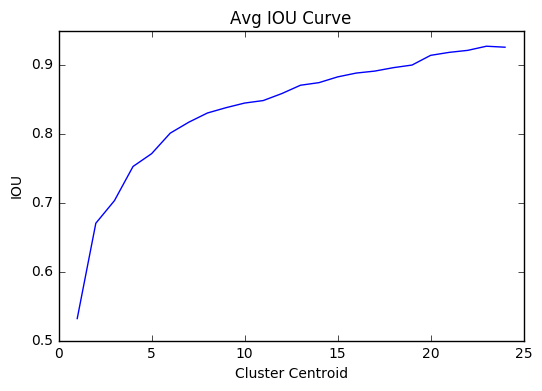

In [24]:
plt.plot(list(Avg_IOU.keys()),list(Avg_IOU.values()))
plt.title('Avg IOU Curve')
plt.xlabel('Cluster Centroid')
plt.ylabel('IOU')
plt.show()